In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HR_comma_sep.csv')

In [3]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
df.shape

(14999, 10)

In [5]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

C:\Users\Ghost Codm\AppData\Local\Temp\ipykernel_22560\3251675387.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
C:\Users\Ghost Codm\AppData\Local\Temp\ipykernel_22560\3251675387.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
C:\Users\Ghost Codm\AppData\Local\Temp\ipykernel_22560\3251675387.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
C:\Users\Ghost Codm\AppData\Local\Temp\ipykernel_22560\3251675387.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if

In [8]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,0,61,1,0,1,0,7,1
1,0.80,0.86,3,166,4,0,1,0,7,2
2,0.11,0.88,5,176,2,0,1,0,7,2
3,0.72,0.87,3,127,3,0,1,0,7,1
4,0.37,0.52,0,63,1,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,0,55,1,0,1,0,8,1
14995,0.37,0.48,0,64,1,0,1,0,8,1
14996,0.37,0.53,0,47,1,0,1,0,8,1
14997,0.11,0.96,4,184,2,0,1,0,8,1


<Axes: xlabel='salary', ylabel='count'>

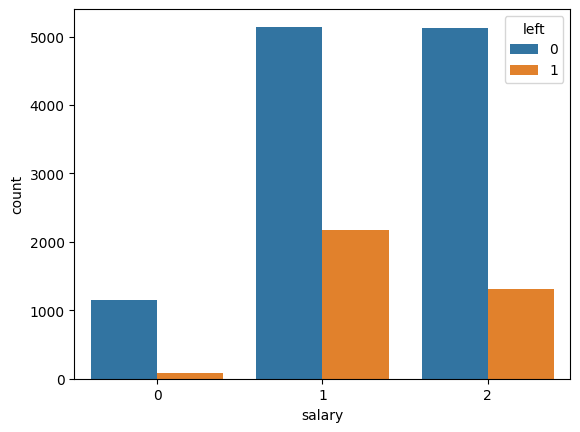

In [12]:
import seaborn as sns
sns.countplot(x='salary',hue='left',data=df,)

<Axes: xlabel='Department', ylabel='count'>

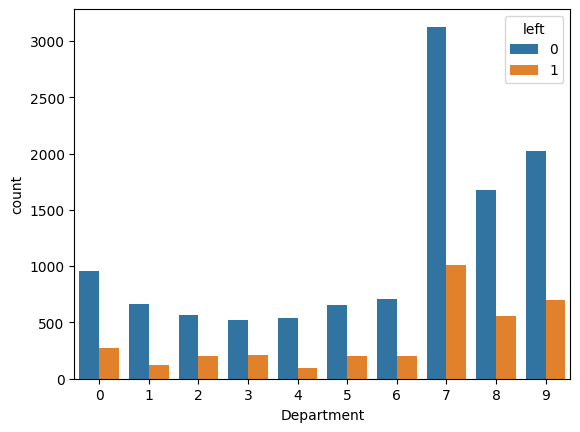

In [13]:
sns.countplot(x='Department',hue='left',data=df)

In [14]:
x = df.drop(['left'],axis=1)

In [15]:
y = df['left']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=.25,random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression()

In [21]:
model.fit(xtrain,ytrain)

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
model.score(xtest,ytest)

0.7645333333333333

In [23]:
model.predict(xtest)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
predicted_probabilities = model.predict_proba(xtest)

In [25]:
predicted_probabilities

array([[0.95953414, 0.04046586],
       [0.93997487, 0.06002513],
       [0.81644737, 0.18355263],
       ...,
       [0.91559138, 0.08440862],
       [0.94741446, 0.05258554],
       [0.9874139 , 0.0125861 ]])